#### Import necessary libs

In [2]:
import matplotlib.pyplot as plt
from qiskit import qasm2
from applications.graph.graph_problem import GraphProblem
from classical_to_quantum.applications.graph.grover_applications.graph_oracle import *
from classical_to_quantum.algorithms.grover import GroverWrapper
from classical_to_quantum.applications.graph.grover_applications.graph_color import GraphColor
from classical_to_quantum.applications.graph.Ising import Ising
from qiskit_algorithms import GroverResult
from typing import List, Dict
import matplotlib.pyplot as plt
import networkx as nx
from classical_to_quantum.qasm_generate import QASMGenerator
from qiskit import qasm2
from classical_to_quantum.applications.graph.grover_applications.grover_auxiliary import *
from classical_to_quantum.applications.graph.ising_auxiliary import *


### Example: Independent Set
- 1. Grover algorithm, from IS to conjunctive normal formula, then construct an oracle from this cnf, then do a search
- 2. QAOA (Quantum Approximate Optimization Algorithm)

In [162]:
graph_problem = GraphProblem("/Users/mac/workspace/quantum-journey/QUANTUM-CLASSICAL-TRANSLATION/classical_to_quantum/cases/Gset/G0")
independent_set_cnf = independent_set_to_sat(graph_problem.graph())
independent_set_oracle = cnf_to_quantum_oracle(independent_set_cnf)
def fun(state):
    return True
grover = GroverWrapper(oracle=independent_set_oracle,
                       iterations=2,
                       is_good_state=fun,
                       objective_qubits=list(range(graph_problem.num_nodes)))
is_res = grover.run(verbose=True)
top_measurements = is_res.top_measurement
print(top_measurements)

10
     ┌───┐┌────┐┌────┐
q_0: ┤ H ├┤0   ├┤0   ├
     ├───┤│    ││    │
q_1: ┤ H ├┤1   ├┤1   ├
     ├───┤│    ││    │
q_2: ┤ H ├┤2   ├┤2   ├
     ├───┤│    ││    │
q_3: ┤ H ├┤3   ├┤3   ├
     └───┘│    ││    │
q_4: ─────┤4   ├┤4   ├
          │  Q ││  Q │
q_5: ─────┤5   ├┤5   ├
          │    ││    │
q_6: ─────┤6   ├┤6   ├
          │    ││    │
q_7: ─────┤7   ├┤7   ├
          │    ││    │
q_8: ─────┤8   ├┤8   ├
          │    ││    │
q_9: ─────┤9   ├┤9   ├
          └────┘└────┘
c: 4/═════════════════
                      
{   'assignment': '0000',
    'circuit_results': [   {   '0000': 0.1406249999999966,
                               '0001': 0.1406249999999965,
                               '0010': 0.1406249999999962,
                               '0011': 0.0156249999999996,
                               '0100': 0.1406249999999961,
                               '0101': 0.0156249999999996,
                               '0110': 0.0156249999999996,
                             

# TOP solutions which are all correct!!!

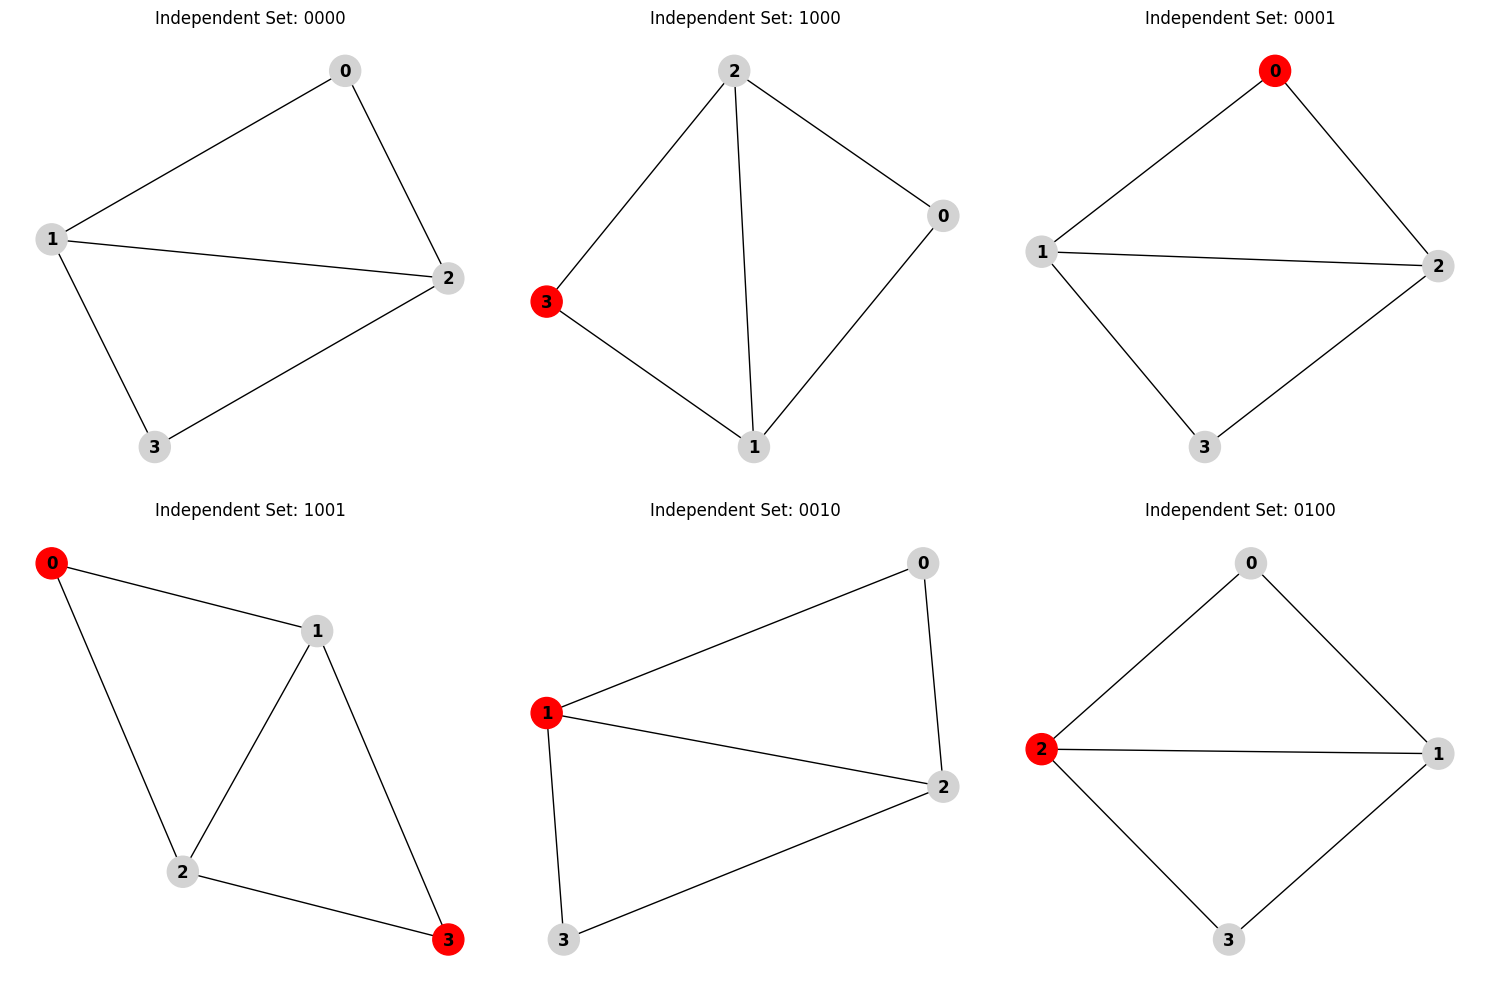

In [182]:
top_is_measurements = get_top_measurements(is_res, num=100)
plot_multiple_independent_sets(graph_problem.graph(), top_is_measurements)

### Example: graph coloring
- 1. Coloring problems are reduced to SAT(short for Satisfiability Problem) then a quantum oracle and grover algorithms are given

In [164]:
coloring_problem = GraphColor("/Users/mac/workspace/quantum-journey/QUANTUM-CLASSICAL-TRANSLATION/classical_to_quantum/cases/Gset/G0", verbose=True)
coloring_grover_res = coloring_problem.search()

Variable Qubits: [0, 1, 2, 3, 4, 5, 6, 7]
Check Qubits: [8, 9, 10, 11, 12]
Disagree List: [[[0, 1], [2, 3]], [[0, 1], [4, 5]], [[2, 3], [4, 5]], [[2, 3], [6, 7]], [[4, 5], [6, 7]]]
Output Qubit: 13
14
      ┌───┐┌─────┐
 q_0: ┤ H ├┤0    ├
      ├───┤│     │
 q_1: ┤ H ├┤1    ├
      ├───┤│     │
 q_2: ┤ H ├┤2    ├
      ├───┤│     │
 q_3: ┤ H ├┤3    ├
      ├───┤│     │
 q_4: ┤ H ├┤4    ├
      ├───┤│     │
 q_5: ┤ H ├┤5    ├
      ├───┤│     │
 q_6: ┤ H ├┤6    ├
      ├───┤│   Q │
 q_7: ┤ H ├┤7    ├
      └───┘│     │
 q_8: ─────┤8    ├
           │     │
 q_9: ─────┤9    ├
           │     │
q_10: ─────┤10   ├
           │     │
q_11: ─────┤11   ├
           │     │
q_12: ─────┤12   ├
           │     │
q_13: ─────┤13   ├
           └─────┘
 c: 8/════════════
                  


### fetch the top measurements, which are more likely to be solutions

In [184]:
bitstring_results = get_top_measurements(coloring_grover_res)
bitstring_results    

[{'00011000': 0.0118408203125005},
 {'00011011': 0.0118408203125005},
 {'00100111': 0.0118408203125005}]

Plotting for bitstring 00011000 with color assignment: {0: 'red', 1: 'green', 2: 'blue', 3: 'red'}
Plotting for bitstring 00011011 with color assignment: {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
Plotting for bitstring 00100111 with color assignment: {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}


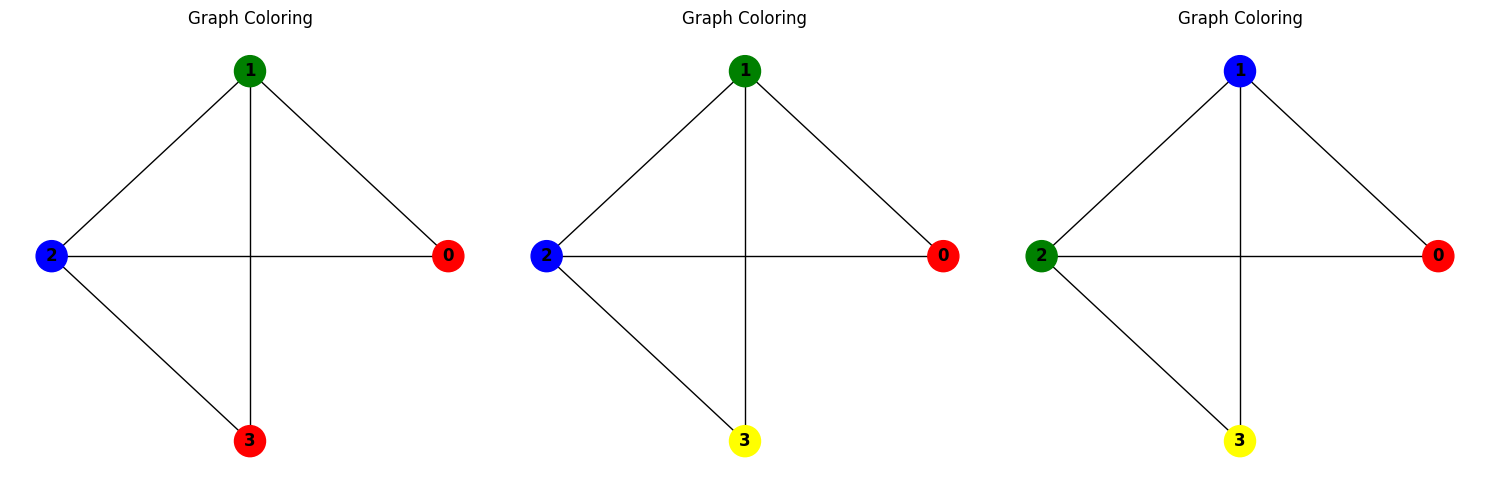

In [191]:
plot_multiple_graph_colorings(coloring_problem.graph(), bitstring_results, num_per_row=3)


-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0


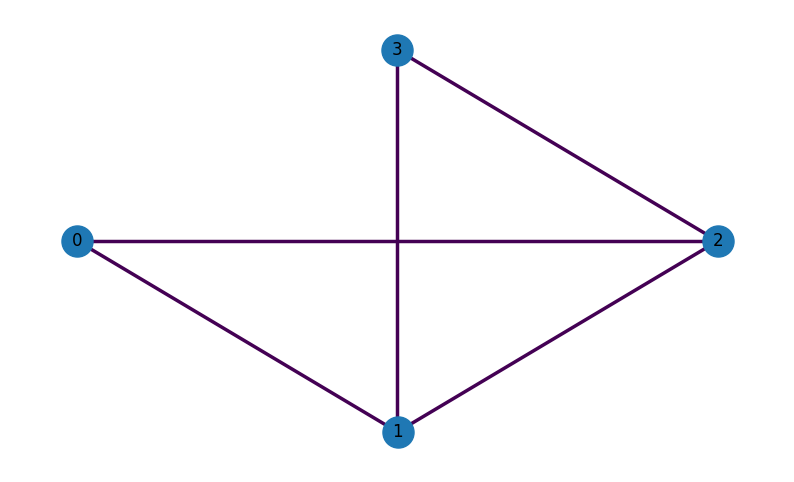

{'angles': [0.571470615103, 0.355649332364, 0.118140133475, 0.118358765045, 0.344937261205, 0.592615966266], 'cost': 2219.529999999999, 'measurement_outcomes': {'1101110101011001': 1, '1111100110010101': 1, '1010110011001000': 1, '0011010001001100': 1, '0100101010100101': 1, '1001010000100000': 1, '1100111100110011': 1, '1100001001100000': 1, '1100100000010110': 1, '0000100110010100': 1, '0111010001100011': 1, '1001100110110110': 1, '0101100011000100': 1, '1010000000000011': 1, '1100010101111001': 1, '1000011101111110': 1, '0000100110010111': 1, '0001110001010010': 1, '0100100010110010': 1, '1010111011100001': 1, '0011110110000000': 1, '1111011001100100': 1, '0001001110111010': 1, '0000011111000000': 1, '1001100010000100': 1, '0010101101001010': 1, '0000100110011001': 1, '1111001000100010': 1, '0001110001000111': 1, '0011110011110010': 1, '0101010001001010': 1, '0101011011000100': 1, '1011110101001011': 1, '1000000100011101': 1, '0110010101100111': 1, '0111010001000100': 1, '1001100010

In [192]:
coloring_problem_ising = Ising(graph_problem.graph(), "KColor")
coloring_problem_ising.plot_graph()
plt.show()
result = coloring_problem_ising.run(verbose=True)
print(result.most_probable_states)

0011000000001001


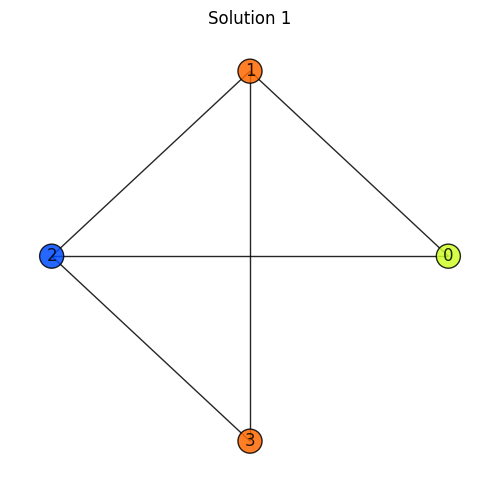

In [195]:
solutions = result.most_probable_states.get('solutions_bitstrings')
print(solutions[0])

plot_first_valid_coloring_solutions(solutions, coloring_problem_ising)
    


# Classical bruteforce solutions for independent set and its recommended quantum solutions: quantum oracle and QAOA are given

In [1]:
independent_set_code = """
import itertools

def is_independent_set(graph, subset):
    # Check if the subset is an independent set
    for i in range(len(subset)):
        for j in range(i + 1, len(subset)):
            if graph[subset[i]][subset[j]] == 1:
                return False
    return True

def find_max_independent_set(graph):
    n = len(graph)
    nodes = list(range(n))
    max_independent_set = []

    # Check all possible subsets
    for size in range(1, n + 1):
        for subset in itertools.combinations(nodes, size):
            if is_independent_set(graph, subset):
                if len(subset) > len(max_independent_set):
                    max_independent_set = subset

    return max_independent_set

# Example usage:
# Adjacency matrix representation of the graph
graph = [
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0]
]

max_independent_set = find_max_independent_set(graph)
print("Maximum Independent Set:", max_independent_set)
"""
generator = QASMGenerator()
qasm_code = generator.qasm_generate(classical_code=independent_set_code, verbose=False)
grover_code = qasm_code.get('grover')
qaoa_code = qasm_code.get('qaoa')

[<class 'classical_to_quantum.applications.graph.Ising.Ising'>, <class 'classical_to_quantum.applications.graph.graph_problem.GraphProblem'>]
<class 'classical_to_quantum.applications.graph.Ising.Ising'>
-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0
<class 'classical_to_quantum.applications.graph.graph_problem.GraphProblem'>


## Generated QA3M code

In [4]:
from qiskit import qasm2
grover_circuit = qasm2.loads(grover_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
qaoa_circuit = qasm2.loads(qaoa_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qaoa_circuit)
print(grover_circuit)

        ┌───┐                ┌───────┐   ┌─────────────┐                »
  q1_0: ┤ H ├─■──────────────┤ Rz(0) ├───┤ Rx(-1.1731) ├────────────────»
        ├───┤ │ZZ(0.11975)   └───────┘   └─────────────┘┌──────────────┐»
  q1_1: ┤ H ├─■─────────────■──────────────■────────────┤ Rz(-0.23949) ├»
        ├───┤               │ZZ(0.11975)   │            └──────────────┘»
  q1_2: ┤ H ├───────────────■──────────────┼──────────────■─────────────»
        ├───┤                              │ZZ(0.11975)   │             »
  q1_3: ┤ H ├──────────────────────────────■──────────────┼─────────────»
        ├───┤                                             │ZZ(0.11975)  »
  q1_4: ┤ H ├─────────────────────────────────────────────■─────────────»
        └───┘                                                           »
meas: 5/════════════════════════════════════════════════════════════════»
                                                                        »
«                                     

In [4]:
grover_circuit = qasm2.loads(grover_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
qaoa_circuit = qasm2.loads(qaoa_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qaoa_circuit)
print(grover_circuit)

        ┌───┐                ┌───────┐   ┌─────────────┐                »
  q1_0: ┤ H ├─■──────────────┤ Rz(0) ├───┤ Rx(-1.1731) ├────────────────»
        ├───┤ │ZZ(0.11975)   └───────┘   └─────────────┘┌──────────────┐»
  q1_1: ┤ H ├─■─────────────■──────────────■────────────┤ Rz(-0.23949) ├»
        ├───┤               │ZZ(0.11975)   │            └──────────────┘»
  q1_2: ┤ H ├───────────────■──────────────┼──────────────■─────────────»
        ├───┤                              │ZZ(0.11975)   │             »
  q1_3: ┤ H ├──────────────────────────────■──────────────┼─────────────»
        ├───┤                                             │ZZ(0.11975)  »
  q1_4: ┤ H ├─────────────────────────────────────────────■─────────────»
        └───┘                                                           »
meas: 5/════════════════════════════════════════════════════════════════»
                                                                        »
«                                     

# An example for coloring problem, where generator recommends grover algorithm and QAOA

In [3]:
coloring_code = """
import networkx as nx
import matplotlib.pyplot as plt

def greedy_graph_coloring(G):
    color_assignment = {}
    for node in G.nodes():
        available_colors = set(range(len(G.nodes())))
        
        # Exclude colors of adjacent nodes
        for neighbor in G.neighbors(node):
            if neighbor in color_assignment:
                available_colors.discard(color_assignment[neighbor])
        
        # Assign the smallest available color
        color_assignment[node] = min(available_colors)
    
    return color_assignment

def plot_colored_graph(G, color_assignment):
    pos = nx.spring_layout(G)
    node_colors = [color_assignment[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500, font_weight='bold')
    plt.show()

# Example usage
# Create a sample graph
G = nx.cycle_graph(6)  # Cycle graph with 6 nodes
G.add_edges_from([(0, 2), (2, 4)])  # Adding more edges to make the graph more complex

# Solve the coloring problem
color_assignment = greedy_graph_coloring(G)
print("Color assignment:", color_assignment)

# Plot the result
plot_colored_graph(G, color_assignment)
"""
generator = QASMGenerator()
qasm_code = generator.qasm_generate(classical_code=coloring_code, verbose=False)
grover_code = qasm_code.get('grover')
qaoa_code = qasm_code.get('qaoa')
grover_circuit = qasm2.loads(grover_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
qaoa_circuit = qasm2.loads(qaoa_code, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
print(qaoa_circuit)
print(grover_circuit)

[<class 'classical_to_quantum.applications.graph.Ising.Ising'>, <class 'classical_to_quantum.applications.graph.grover_applications.graph_color.GraphColor'>]
<class 'classical_to_quantum.applications.graph.Ising.Ising'>
-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0
<class 'classical_to_quantum.applications.graph.grover_applications.graph_color.GraphColor'>
         ┌───┐                                                                 »
   q1_0: ┤ H ├─■─────────────────────────■────────────■────────────■───────────»
         ├───┤ │                         │ZZ(4.0689)  │            │           »
   q1_1: ┤ H ├─┼────────────■────────────■────────────┼────────────┼───────────»
         ├───┤ │            │                         │ZZ(4.0689)  │           »
   q1_2: ┤ H ├─┼────────────┼────────────■────────────■────────────┼───────────»
         ├───┤ │            │            │                         │ZZ(4.0689